In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install Kaggle

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
 99% 769M/778M [00:05<00:00, 144MB/s]
100% 778M/778M [00:05<00:00, 146MB/s]


In [5]:
!unzip covid19-radiography-database.zip -d ./covid19_data

Streaming output truncated to the last 5000 lines.
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: ./covid19_data/COVID-19_Radiography_Dataset/Normal/masks/

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
path=r"/content/covid19_data/COVID-19_Radiography_Dataset"
classes=["Covid","Lung_Opacity","Normal","Viral Pneumonia"]
num_classes=len(classes)
batch_size=16

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

In [9]:
train_gen = train_datagen.flow_from_directory(
    directory=path,
    target_size=(64, 64),  # Resize the images to 64x64 if your model expects this size
    class_mode="categorical",
    subset="training",
    shuffle=True,
    classes=classes,
    batch_size=batch_size,
    color_mode="rgb"
)


Found 28080 images belonging to 4 classes.


In [10]:
test_gen = test_datagen.flow_from_directory(
    directory=path,
    target_size=(64, 64),  # Resize the images to 64x64 if your model expects this size
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    classes=classes,
    batch_size=batch_size,
    color_mode="rgb"
)

Found 7018 images belonging to 4 classes.


In [11]:
train_gen.class_indices

{'Covid': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

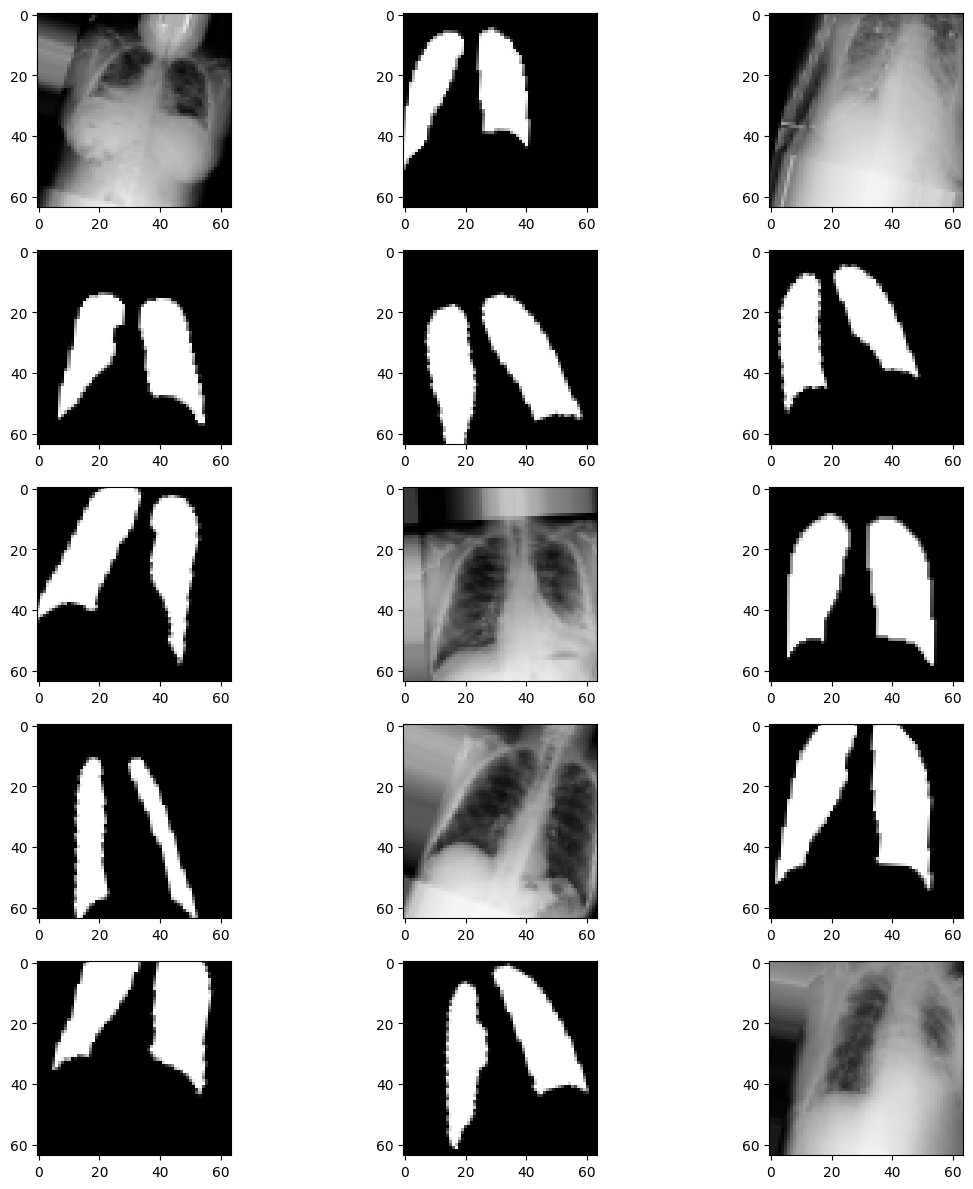

In [12]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X,Y in train_gen:
    image=X[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [13]:
X[0].shape

(64, 64, 3)

In [14]:
X.shape

(16, 64, 64, 3)

In [15]:
Y[0].shape

(4,)

In [16]:
Y.shape

(16, 4)

In [17]:
Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu")

<Conv2D name=conv2d, built=False>

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from keras import backend as K

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Ensure the first Dense layer matches the flattened size
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))

# Output layer for classification (assuming 4 classes)
model.add(Dense(4, activation="softmax"))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,668 (6.20 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(train_gen, epochs=10, validation_data=test_gen)

Epoch 1/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 296s 167ms/step - accuracy: 0.5887 - loss: 0.8349 - val_accuracy: 0.7841 - val_loss: 0.5284
Epoch 2/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 318s 165ms/step - accuracy: 0.7095 - loss: 0.6293 - val_accuracy: 0.8066 - val_loss: 0.4480
Epoch 3/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 325s 167ms/step - accuracy: 0.7432 - loss: 0.5749 - val_accuracy: 0.8071 - val_loss: 0.4585
Epoch 4/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 329s 170ms/step - accuracy: 0.7617 - loss: 0.5458 - val_accuracy: 0.8168 - val_loss: 0.4170
Epoch 5/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 313s 166ms/step - accuracy: 0.7704 - loss: 0.5257 - val_accuracy: 0.8300 - val_loss: 0.4188
Epoch 6/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 320s 164ms/step - accuracy: 0.7762 - loss: 0.5147 - val_accuracy: 0.8531 - val_loss: 0.3734
Epoch 7/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 284s 162ms/step - accuracy: 0.7900 - loss: 0.4987 - val_accuracy: 0.8501 - val_loss: 0.3752
Epoch 8/10
1755/1755 ━━━━━━━━━━━━━━━━━━━━ 322s 162ms/step - ac